# Clustering Analysis on Wholesale Customers Dataset

In [1]:
# Importing the necessary libraries for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset from locally downloaded file

df = pd.read_csv("D:\BITS DS & AI\Trimester 1\Statistical Modelling\Assignment\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Exploration and Preparation

### Understanding the Data

- Check data shape - tells us rows and columns of the dataset
- Check data info - explains the name of columns, their data types, non-null enteries, indexing and memory storage space
- Check for missing/null values
- Check for duplicate enteries
- Find out unique counts in every variable

In [3]:
df.shape

(440, 8)

The dataset contains 440 records with 8 features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
missing_values = df.isnull().sum() # sum of missing values in every variable
missing_values = missing_values[missing_values>0].sort_values(ascending=False) # arrange the variables in descending order of total missing value
print(missing_values)

Series([], dtype: int64)


<font size=3>
    
**There is no missing value found in the dataset**

In [6]:
# Missing value percent for each attribute
(df.isnull().sum()*100)/df.shape[0]

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

In [8]:
# finding dupicate enteries
df[df.duplicated()]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


<font size=3>
    
**No duplicate value found**

In [9]:
unique_count = df.nunique()
print(unique_count)

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64


.   
**From the above results,  
This what I can understand about the data variables:**   
.   


| Variable Name     | Type of Variable | Description                                                                                                   |  
|-------------------|------------------|---------------------------------------------------------------------------------------------------------------|  
| CHANNEL           | Categorical      | The channel through which the customer was acquired : 1-Horeca (Hotel/Restaurant/Cafe) or 2-Retail channel -(Nominal) |                 |
| REGION            | Categorical      | The region where the customer is located : 1-Lisnon, 2-Oporto or 3-Other -(Nominal)                           |  
| FRESH             | Numerical        | annual spending (m.u.) on fresh products -(Continuous)                                                         |                 |
| MILK              | Numerical        | annual spending (m.u.) on milk products -(Continuous)                                                          |                 |
| GROCERY           | Numerical        | annual spending (m.u.) on grocery products -(Continuous)                                                       |                 |
| FROZEN            | Numerical        | annual spending (m.u.) on frozen products -(Continuous)                                                        |                 |
| DETERGENTS_PAPER  | Numerical        | annual spending (m.u.) on detergents and paper products -(Continuous)                                          |                 |
| DELICATESSEN      | Numerical        | annual spending (m.u.) on delicatessen products -(Continuous)                                                  |                 |


In [10]:
# classifying and grouping the numerical columns and categorical columns in new variables for further analysis

num_cols = df[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]
cat_cols = df[["Channel","Region"]]

### Exploratory Data Analysis (EDA)

- Explore the relationships between variables
- Infer from the data statistics and data visuals

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


1. Since Channel and Region are ctaegorical variables with discrete values ranging from 1-3,
      - the mean value shows Channel 1 (through which customer is acquired) is more dominant in the dataset.
      - Region mean value shows that 2-Region and then 3-Region data points are more represented in the dataset
2. Fresh products mean price value is $12000 and SD=12647 means that the value has high variability
3. Milk products, Grocery products, Frozen products, detergents & paper products and Delicassen products all show same behaviour of high variance in the data where the range of the data is very, very large.

Channel
1    298
2    142
Name: count, dtype: int64


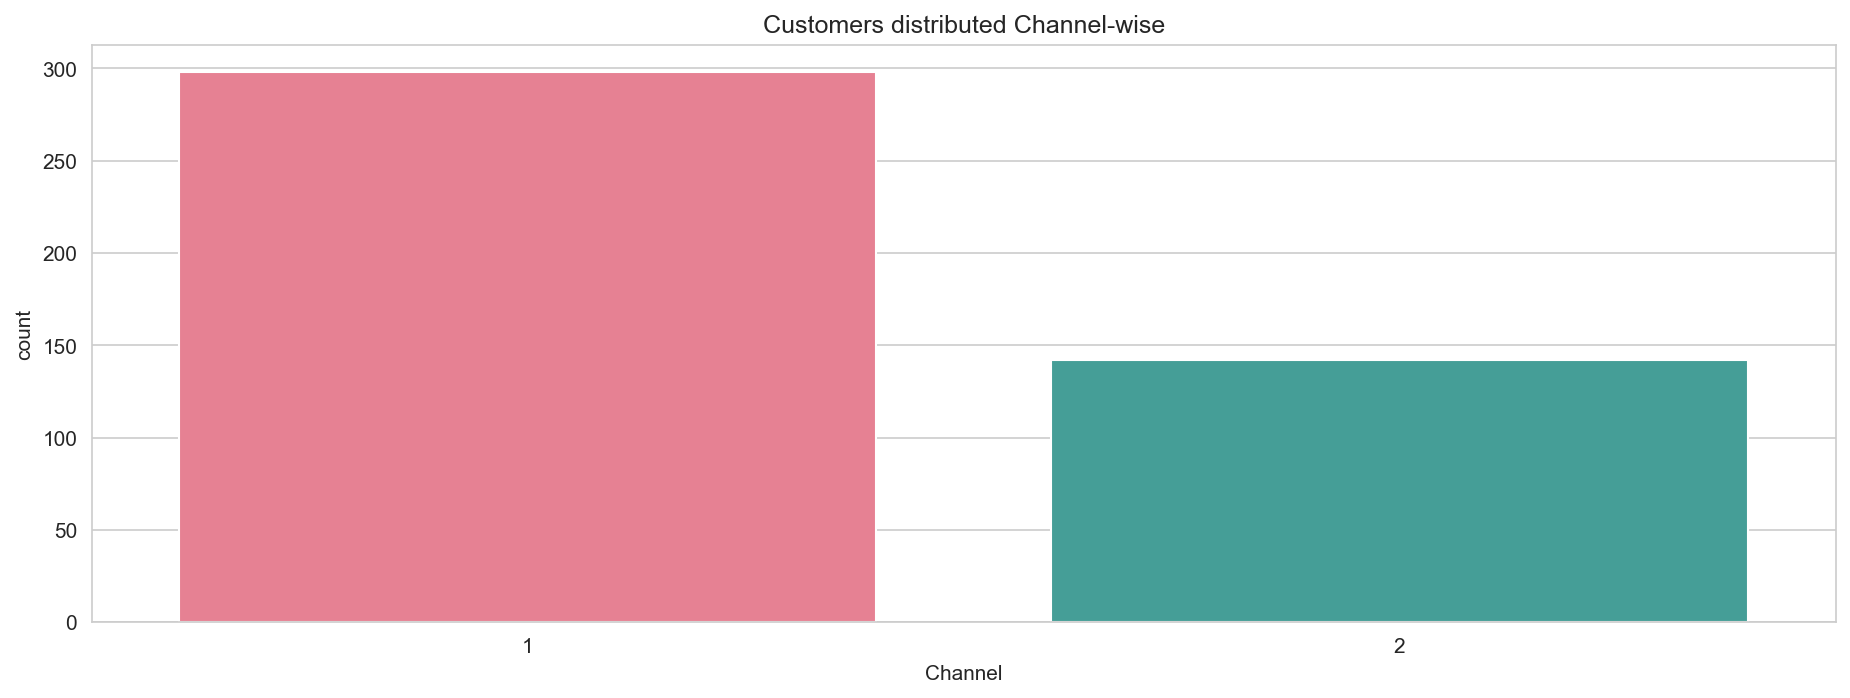

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
sns.countplot(data=df, x='Channel', palette='husl')
plt.title("Customers distributed Channel-wise")
print(df['Channel'].value_counts())
plt.show()


Region
3    316
1     77
2     47
Name: count, dtype: int64


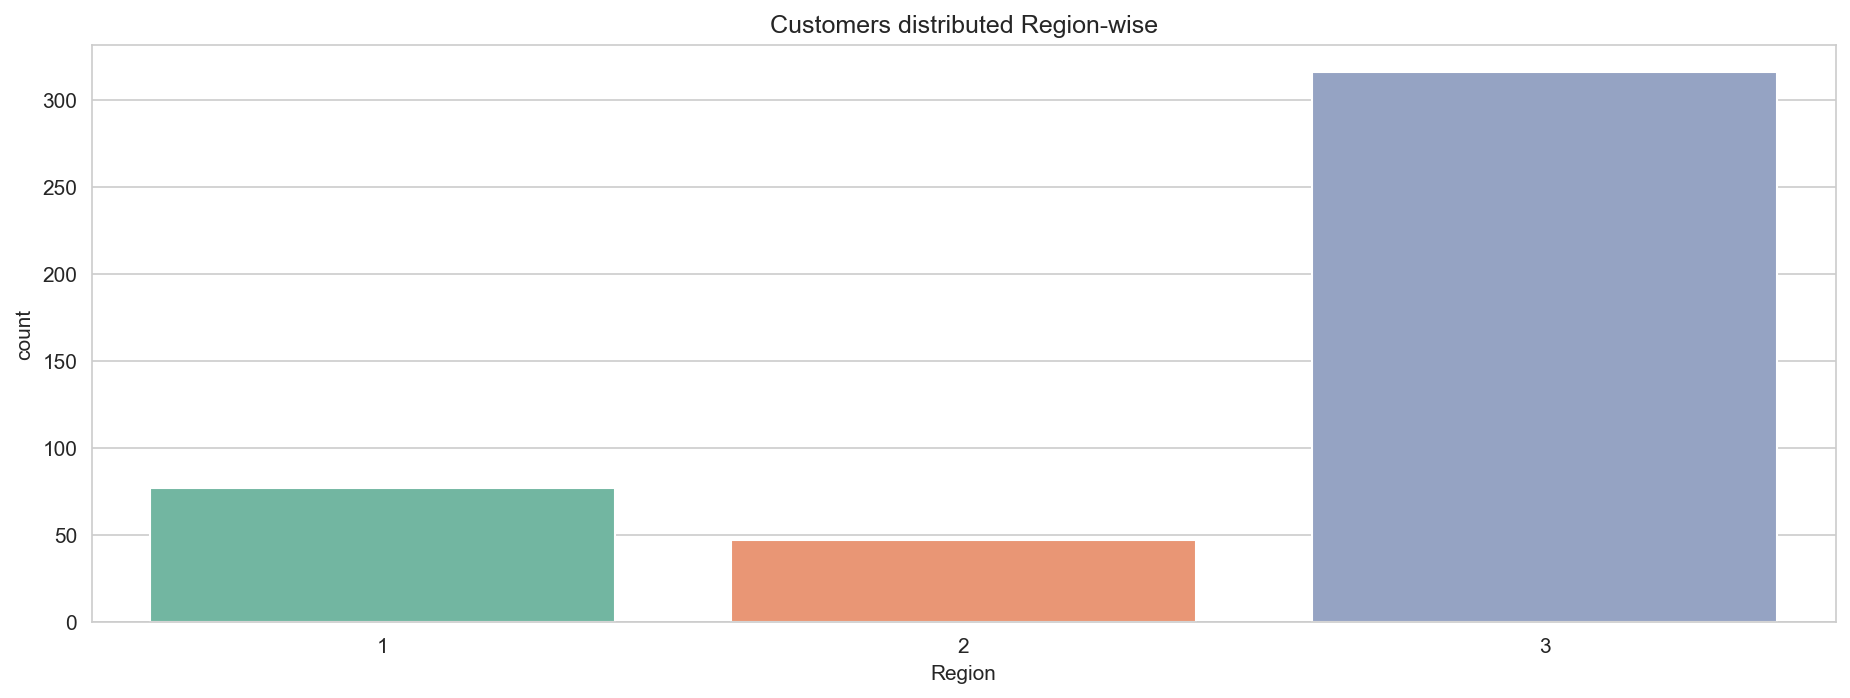

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
sns.countplot(data=df, x='Region', palette='Set2')
plt.title("Customers distributed Region-wise")
print(df['Region'].value_counts())
plt.show()

As we saw in the statistical summary, majority of the data is represented by Channel 1 and Region-3; we can see that here in the countplot too.

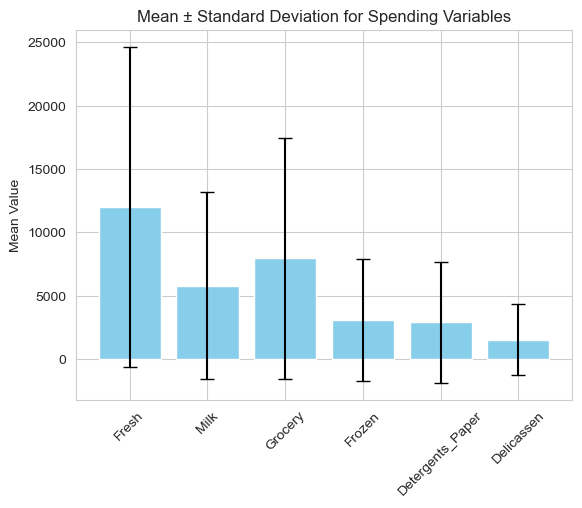

In [14]:
variables = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]
means = [12000.297727, 5796.265909, 7951.277273, 3071.931818, 2881.493182, 1524.870455]
stds = [12647.328865, 7380.377175, 9503.162829, 4854.673333, 4767.854448, 2820.105937]

plt.bar(variables, means, yerr=stds, capsize=5, color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Mean Value")
plt.title("Mean ± Standard Deviation for Spending Variables")
plt.show()


- Fresh is the most purchased category in volume. But customers differ drastically -> some buy very little, some buy extremely large quantities.
- Grocery has the second-highest variability after Fresh. Milk and Grocery likely form distinct customer types (e.g., retailers vs. restaurants).
- Frozen, Detergents_Paper, and Delicatessen have lower means but still very high standard deviations.

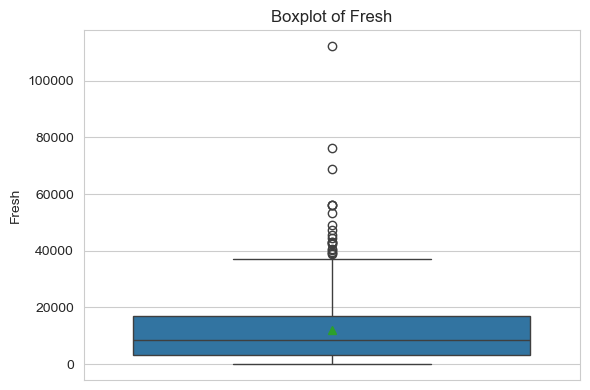

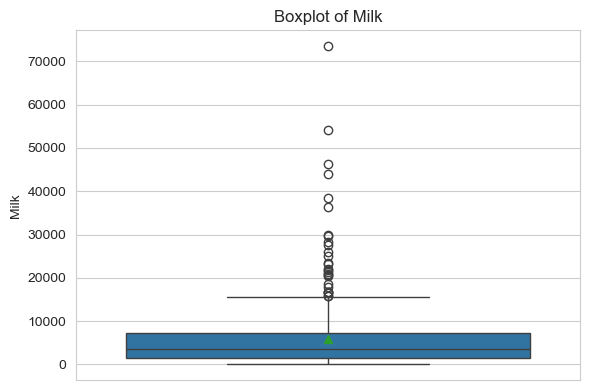

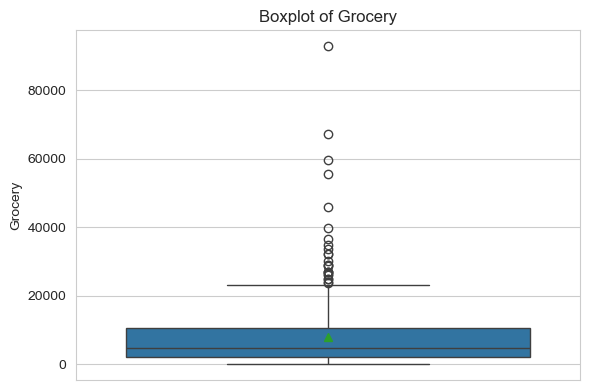

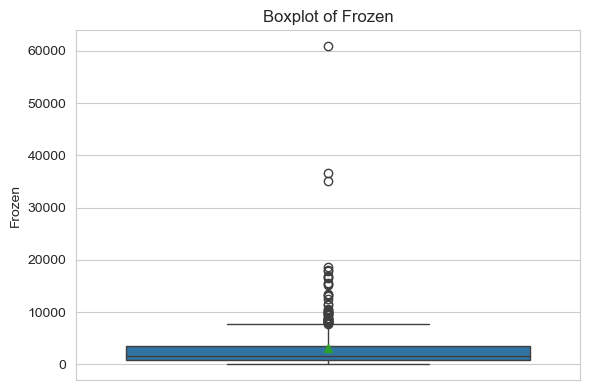

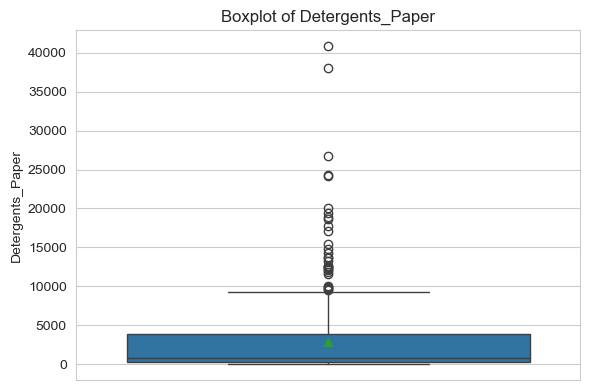

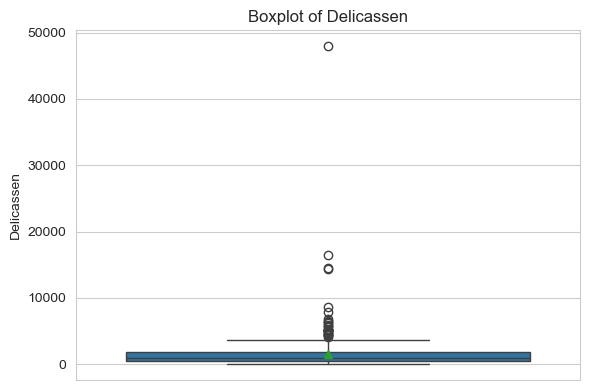

In [15]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col], showmeans=True)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

- Boxplots for all six spending categories show high right-skewness and lots of high-end outliers.   
- Fresh, Milk, and Grocery have the largest spreads, indicating highly variable customer purchasing patterns. Even lower-volume categories (Frozen, Detergents_Paper, Delicatessen) show substantial variability.   

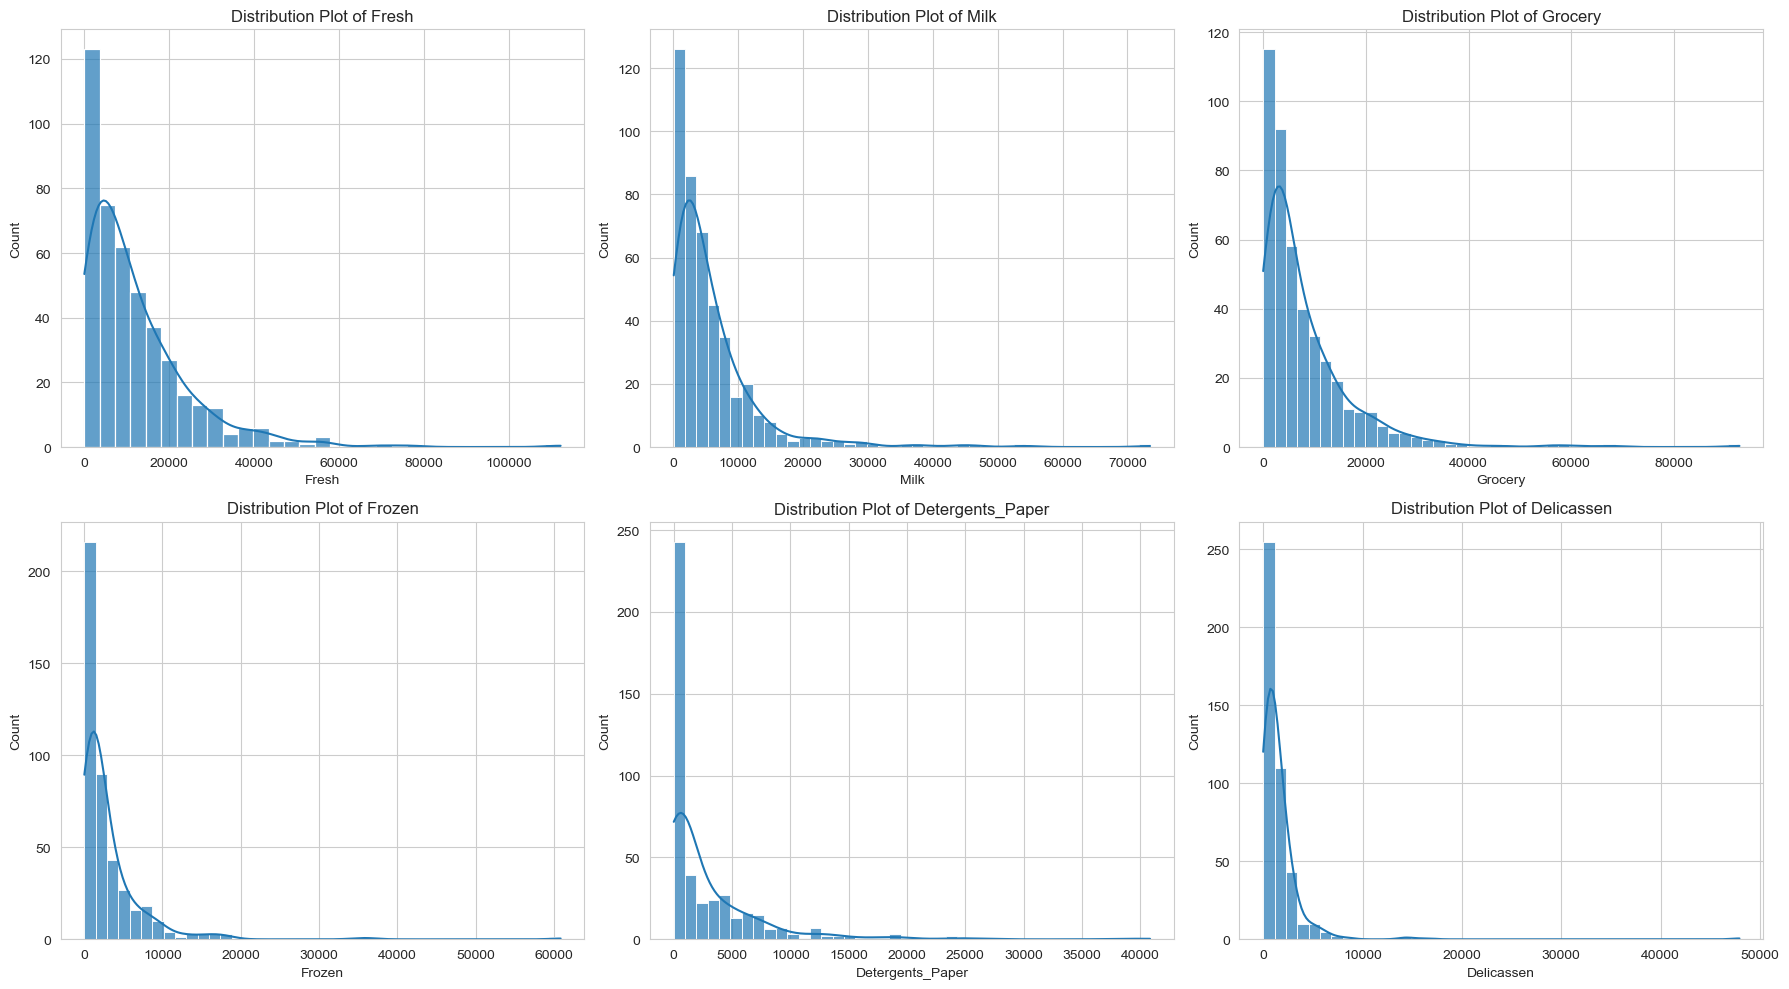

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution Plot of {col}')

plt.tight_layout()
plt.show()

### Correlation Analysis

In [20]:
corr = df.corr()
corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


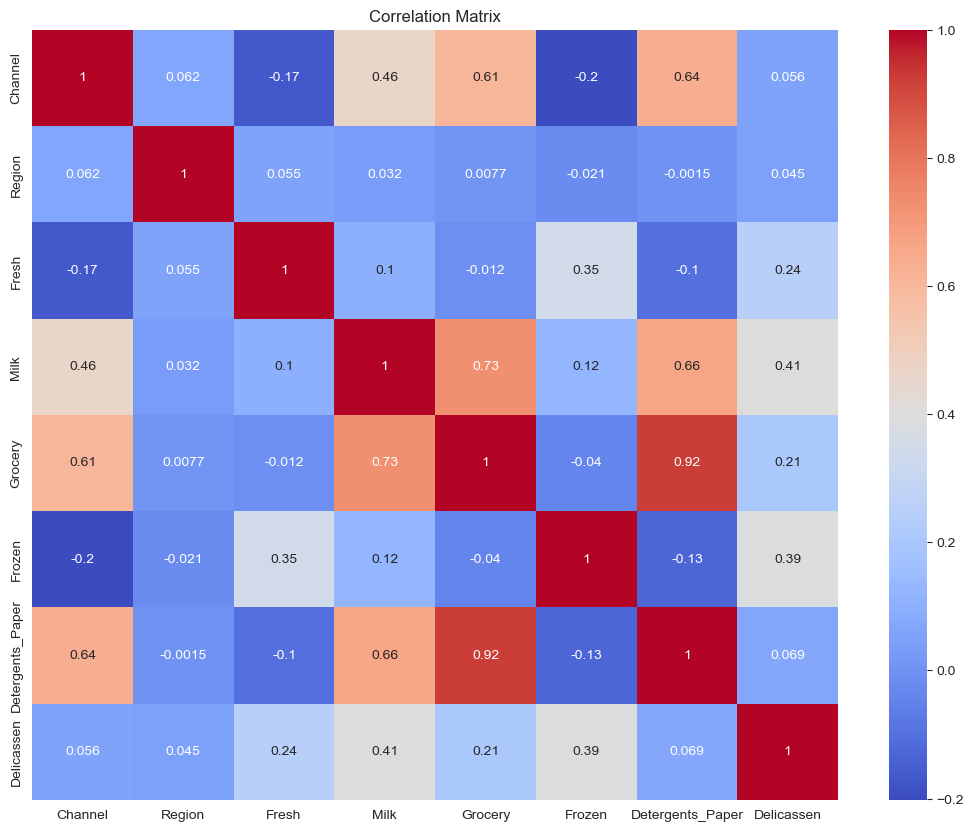

In [21]:
plt.figure(figsize=(13, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap ='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Interpretation:**
- Grocery and Detergents_Paper is very highly positively correlated ~ 0.92 which indicates that customers who buy grocery products tend to also buy detergent_paper products.
- Milk and Grocery are highly positively correlated ~ 0.73 indicating that milk and grocery products are often bought together by the customers.
- Milk is positively correlated with Detergents_Paper products --> customers who buy milk also buy lots of detergents_paper products.
These patterns suggest general-purpose food retail outlets.
- Customers who purchase a lot of fresh items also tend to buy frozen products to some extent; typical of restaurants, hotels, and catering businesses.
- Geographical region does not influence spending behavior.
- Channel–Grocery: 0.61; Channel–Detergents_Paper: 0.64; Channel–Milk: 0.46 shows
  - Channel 2 = Retailers implies high spending on Grocery/Detergents/Milk
  - Channel 1 = Hotels/restaurants implies higher Fresh usage

### Data Cleaning

In [22]:
# Fill missing values
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [23]:
# Find outlier counts in each column using IQR approach
outlier_counts = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    outlier_counts[col] = (outliers.sum() / df.shape[0])*100

# Creating Dataframe for better readability
df_outliers = df[outliers]

df_outlier_proportion = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier_Count%'])
df_outlier_proportion

,Column,Outlier_Count%
0,Channel,0.000000
1,Region,0.000000
2,Fresh,4.545455
3,Milk,6.363636
4,Grocery,5.454545
5,Frozen,9.772727
6,Detergents_Paper,6.818182
7,Delicassen,6.136364


Since the dataset is very small, its not feasible to remove the records with high percentage of outliers.

### Feature Transformation

Due to high skewness in the numerical features, I am performing log transformations on these variables.  
Log transformation will allows us to keep the outlier customers while normalizing the distribution.

In [24]:
# lOg transformation on Numerical Columns (Spending Variables)

num_cols = np.log1p(num_cols)

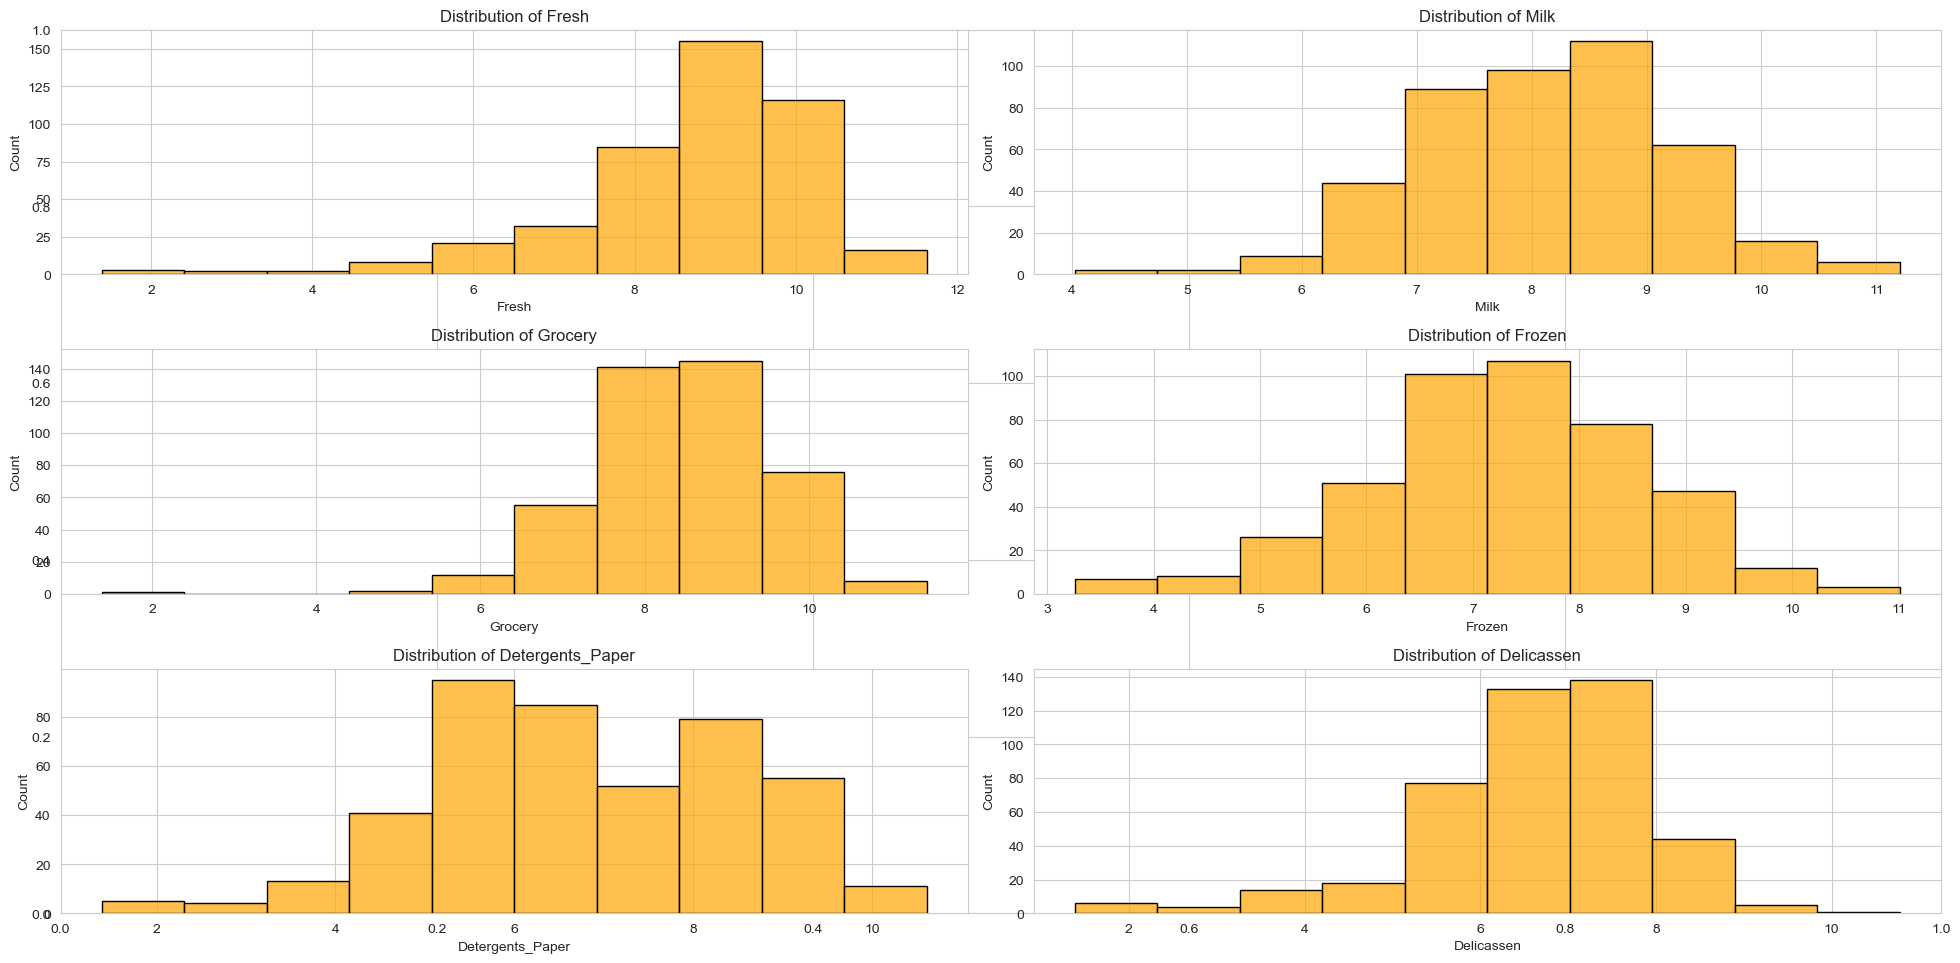

In [25]:
# visualizing the distribution after transformation

fig, axes = plt.subplots(figsize=(20, 10))

for i, col in enumerate(num_cols.columns):
    plt.subplot(int(np.ceil(len(num_cols.columns)/2)), 2, i+1)
    sns.histplot(data=num_cols[col], bins=10, color='orange', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


### Encoding 

- Since the categorical variables - Region and Channel are already encoded to 1s, 2s and 3s.
- We don't need to actually perform the encoding

But here's the structure we can use if there was a need to do encoding   
`df = pd.get_dummies(df, columns=cat_cols, drop_first=True)`

- If there were boolean categorical columns then we can change their data type to integer  
`bool_cols = df.select_dtypes(include='bool').columns`  
`df[bool_cols] = df[bool_cols].astype(int)`

**Here the categorical columns are already encoded and have the data type integer.**

### Scaling

In [26]:
# Stating the features/variables that need to be scaled to an explicit variable
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

X = df[features]

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

# put back into a DataFrame
X_scaled = pd.DataFrame(X_scaled_array, columns=features)

X_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


### Feature Engineering

In [27]:
# Total Spend (measure of how big a customer is)

df['Total_Spend'] = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)

In [28]:
# Perishable Score

df['Perishable_Spend'] = df['Fresh'] + df['Frozen']
df['Perishable%'] = df['Perishable_Spend'] / df['Total_Spend']

In [29]:
# Retail Score

df['Retail_Spend'] = df['Grocery'] + df['Milk'] + df['Detergents_Paper']
df['Retail%'] = df['Retail_Spend'] / df['Total_Spend']

In [30]:
# Scaling the new engineered features

engineered_features = ['Total_Spend', 'Perishable_Spend', 'Perishable%', 'Retail_Spend', 'Retail%']

X_new = df[engineered_features]

scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

# putting in a dataframe 
X_scaled_new = pd.DataFrame(X_scaled_new, columns=X_new.columns)

In [31]:
# merging the previous & original features scaled and new features scaled in same dataframe

df_scaled = pd.concat([X_scaled, X_scaled_new], axis=1)
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Perishable_Spend,Perishable%,Retail_Spend,Retail%
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649,-0.145792,-0.370614,0.163274,0.403965
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514,-0.416436,-0.775172,0.302425,0.759838
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535,-0.420498,-0.868192,0.169131,0.271627
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026,0.306123,0.853808,-0.535830,-0.922460
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011,0.763034,0.340369,-0.112323,-0.576401


## Principal Component Analysis

<font size=4>
PCA reduces dimensionality and shows how customers are spread in reduced space.  
    
It also confirms whether clustering makes sense.

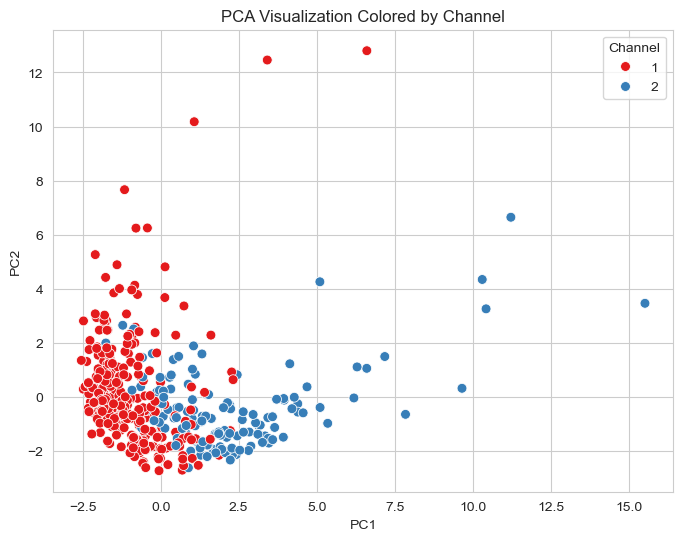

In [32]:
# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Plot
pca_df['Channel'] = df['Channel']   # attach channel

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Channel', palette='Set1', s=50)
plt.title("PCA Visualization Colored by Channel")
plt.show()

Color Segmentation based on Channel:
- Red = Channel 1 Horeca (Hotel/Restaurant/Cafe) customers
- Blue = Channel 2 Retail customers

> Channel 1 customers show:
>> - Lower and more homogeneous spending
>> - Similar purchasing patterns across categories
>> - Less variation in Fresh, Grocery, Milk, and other categories

> Channel 2 customers show:
>> - Higher and more variable spending
>> - Presence of several very large buyers or wholesalers
>> - Stronger activity in categories like Grocery, Milk, and Detergents_Paper

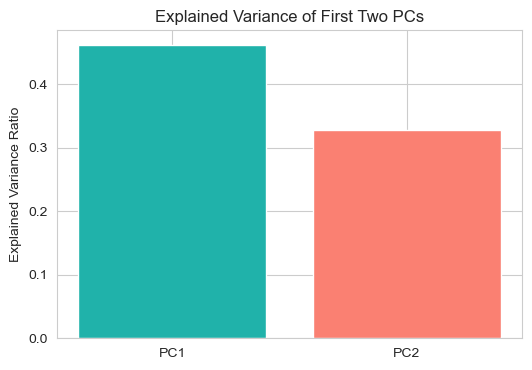

In [33]:
# To show how much information each component keeps
pca_2 = PCA(n_components=2)
pca_2.fit(df_scaled)

evr_2 = pca_2.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.bar(['PC1', 'PC2'], evr_2, color=['lightseagreen', 'salmon'])
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance of First Two PCs")
plt.show()

<font size=5>

**PCA Loadings** 
<font size =3>   
Loadings show how strongly each original variable contributes to each principal component. Higher absolute values mean a stronger influence.

In [34]:
# Fit PCA (2 or more components)
pca = PCA(n_components=2)
pca.fit(df_scaled)

# Component loadings
loadings = pd.DataFrame(
    pca.components_.T,     # transpose so rows = variables
    columns=['PC1', 'PC2'],
    index=df_scaled.columns
)
loadings

,PC1,PC2
Fresh,-0.052802,0.466119
Milk,0.375225,0.144432
Grocery,0.417691,0.050014
Frozen,-0.028972,0.354006
Detergents_Paper,0.401917,-0.011560
Delicassen,0.126003,0.259616
Total_Spend,0.311191,0.373043
Perishable_Spend,-0.053778,0.506463
Perishable%,-0.326987,0.286078
Retail_Spend,0.432724,0.074303


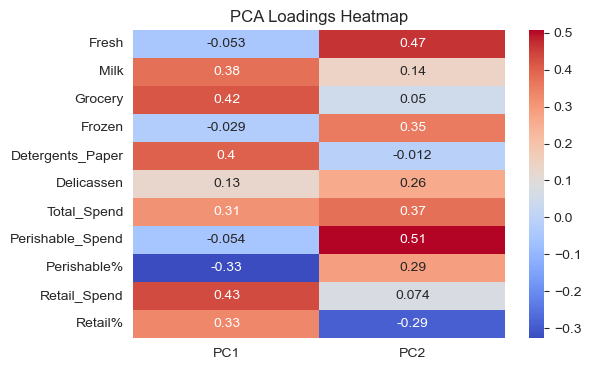

In [35]:
# Visualizing pCA loadings in a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("PCA Loadings Heatmap")
plt.show()

<font size=4>
    
 **Interpretation**
 
<font size=3>
    
1) **`PC1`**

> represents overall purchase volume, with high influence from:
>> - Grocery
>> - Milk
>> - Detergents/Paper

> These are typically retail/commercial store items.  
> PC1 = Retail + General Spending Intensity  
<u>Customers with high PC1 score are high-volume buyers, likely supermarkets, convenience stores, or wholesale distributors who Spend more on non-perishables and general retail items. The negative loading for Perishable% (–0.38) confirms.</u>  
.  
  
3) **`PC2`**

> loads heavily on:  
>> - Fresh
>> - Frozen
>> - Delicatessen

> These categories characterize restaurants, hotels, and catering businesses (HoReCa) that show perishable-heavy purchasing behavior     
> PC2 = Perishable / HoReCa Spending Behavior  
<u>Customers with high PC2 values are typically restaurants, cafés, and hotels that Spend less on retail items (e.g., Detergents, Grocery → negative or near zero). The negative loading for Retail% (–0.34) reinforces this interpretation.</u>

<font size = 6>
    
**Model Development & Validation**

<font size=5>

**Clustering Analysis**

### Choosing Optimal Number of CLusters

- Elbow Method
- Silhoutte Method

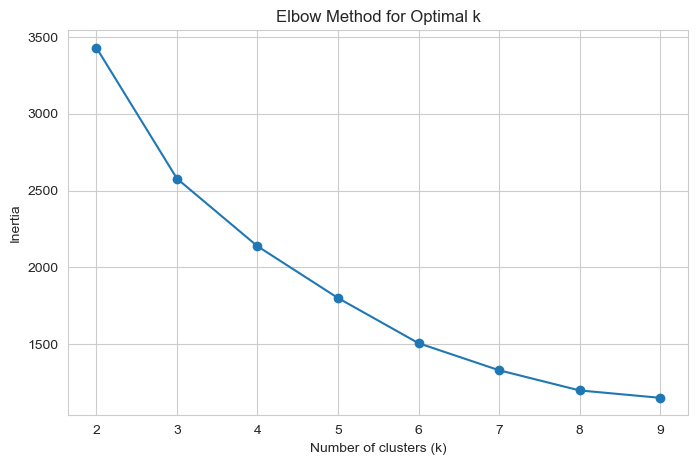

In [36]:
# Elbow Method to find optimal number of k clusters
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


The elbow plot shows a clear bend at k = 3.
After 3 clusters, the inertia reduction slows down significantly, indicating diminishing returns.

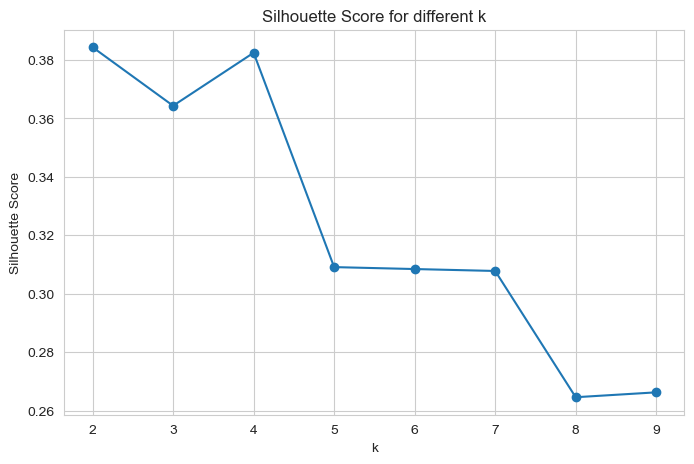

In [37]:
# Applying silhoutte method to find the optimal k for clustering
silhouette = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2,10), silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')
plt.show()


Silhouette Score peaks at k = 3   

<font size=4>

<u>**Optimal no. of clusters k = 3**</u>

### KMeans Cluster Model
<font size = 3>
with k = 3

In [38]:
# Make a clean copy of features
X_final = df_scaled.copy()

# Deploying KMeans with k = 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_final)

# Add cluster labels
df_scaled['Cluster'] = labels

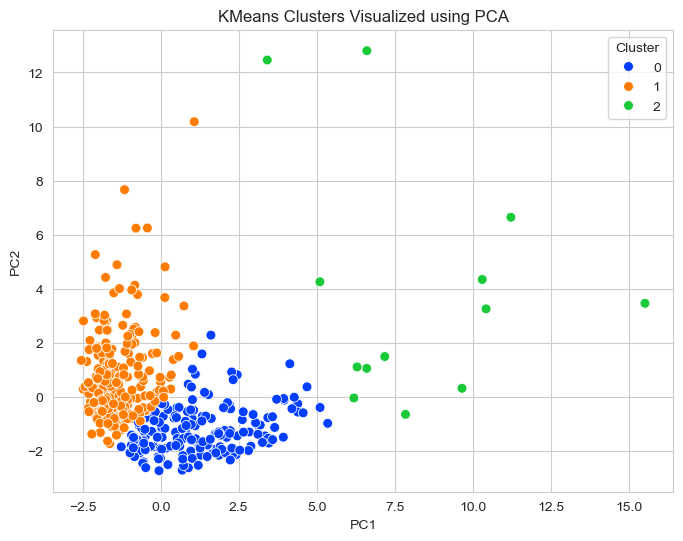

In [39]:
# visualizing the clusters on PCA scatterplot
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

pca_df = pd.DataFrame(pca_components, columns=['PC1','PC2'])
pca_df['Cluster'] = df_scaled['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='bright', s=50)
plt.title("KMeans Clusters Visualized using PCA")
plt.show()


PCA scatterplot shows:
- Cluster 0 (blue) - bottom-right, low-perishable buyers
- Cluster 1 (orange) - left-top area, higher variance, more perishable demand
- Cluster 2 (green) - extreme outliers far on right (PC1 very high)   
.   
PC1 - shows non-perishables, high retail volume customers   
PC2 - shows persihables, high hotel/cafe/restaurants customers
.



In [40]:
# Profile original features to interpret clusters

cluster_profile = pd.concat([df, df_scaled['Cluster']], axis=1).groupby('Cluster').mean()
cluster_profile.T

Cluster,0,1,2
Channel,1.584699,1.098361,1.846154
Region,2.579235,2.512295,2.615385
Fresh,4602.191257,16815.204918,25770.769231
Milk,7670.601093,2826.032787,35160.384615
Grocery,11250.306011,3664.139344,41977.384615
Frozen,1386.551913,4134.967213,6844.538462
Detergents_Paper,4584.775956,699.045082,19867.384615
Delicassen,1453.535519,1239.762295,7880.307692
Total_Spend,30947.961749,29379.151639,137500.769231
Perishable_Spend,5988.743169,20950.172131,32615.307692


Cluster 0
- Spend mainly on Grocery, Milk, Detergents/Paper
- Very little spending on perishables (Fresh/Frozen)
- Retail% extremely high ~ 75%
- Likely small convenience stores, small shops, mini-markets

CLuster 1
- High spend on Fresh, Frozen, Delicatessen
- Very low Grocery, Milk, Detergents
- Perishables make up 63% of spend
- Likely restaurants, hotels, catering services (HoReCa)

CLuster 2
- Highest values across almost every category
- Dominated by Grocery, Milk, Detergents/Paper
- Perishable% nearly zero → meaning they buy mostly shelf-stable, retail goods
- Likely large supermarkets, wholesalers, hypermarkets, distributors

<font size=5>
    
**Cluster Size Distribution**

In [41]:
df_scaled['Cluster'].value_counts()

Cluster
1    244
0    183
2     13
Name: count, dtype: int64

**Cluster 1 - HoReCa (Hotels/Restaurants/Cafés) Customers   
Cluster 0 - Retail-Oriented Buyers   
Cluster 2 - Large Wholesale / High-Value Buyers**

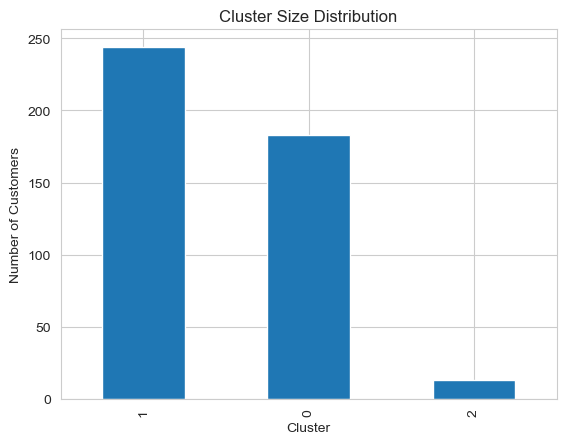

In [42]:
df_scaled['Cluster'].value_counts().plot(kind='bar')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

Cluster 1 is the largest segment and represents the majority of typical customers.   
Cluster 0 is also substantial, forming the second largest group.   
Cluster 2 is a small but strategically important cluster of high-value customers whose spending patterns significantly influence total revenue.

Because clusters align with real-world business customer types, they are:

* Interpretable

* Useful

* Meaningful

Business interpretability validates cluster quality.

## Conclusion

<font size = 4>
The analysis done successfully segmented wholesale customers using PCA-driven insights and clustering techniques. After data cleaning, transformation, and exploration, KMeans with k = 3 was observed as the optimal model based on the Elbow and Silhouette methods. The resulting clusters revealed three distinct customer groups: retail-oriented FMCG buyers, HoReCa clients with high perishable demand, and a small but highly valuable group of large wholesale purchasers. Overall, the clustering solution provides meaningful, actionable segmentation that can support targeted marketing and strategic decision-making for wholesale businesses.